In [1]:
import pandas as pd
import pyfolio as pf
import numpy as np
import matplotlib.pyplot as plt


C:\Users\horac\ana\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [5]:
sp = pd.read_csv(r'C:\Users\horac\Desktop\fintech\Starter_Code\Resources\sp_tsx_history.csv',index_col='Date', parse_dates=True, infer_datetime_format=True).dropna()
sp['Close'] = sp['Close'].str.replace('$', '')
sp['Close'] = sp['Close'].str.replace(',', '').astype(float)
sp['sp_return']=sp['Close'].pct_change()

sp.drop(columns=['Close'], inplace=True)
sp.dropna(how='all')
#calculate sp return
sp.head()

C:\Users\horac\AppData\Local\Temp\ipykernel_2408\791428692.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp['Close'] = sp['Close'].str.replace('$', '')


,sp_return
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [3]:
#df = pd.DataFrame({'dates':sp.iloc[:,0],'col':sp.iloc[:,1]})
#df = df.set_index('dates')
pf.create_returns_tear_sheet(sp['sp_return'])

C:\Users\horac\ana\lib\site-packages\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
C:\Users\horac\ana\lib\site-packages\pyfolio\plotting.py:648: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for stat, value in perf_stats[column].iteritems():


Start date,2012-10-01
End date,2019-12-30
Total months,86
,Backtest
Annual return,4.6%
Cumulative returns,38.2%
Annual volatility,10.5%
Sharpe ratio,0.48
Calmar ratio,0.19
Stability,0.67
Max drawdown,-24.4%


AttributeError: 'numpy.int64' object has no attribute 'to_pydatetime'

# 1. Annual volatility: is variance 	
#  2. Sortino ratio:  similar to sharpe ratio by focus more on negative standard deviation (the higher the better )
# 3. maximum drawdown: maximum observed loss
# 4. Omega ratio: probability weighted upside divided by the probability weighed downside

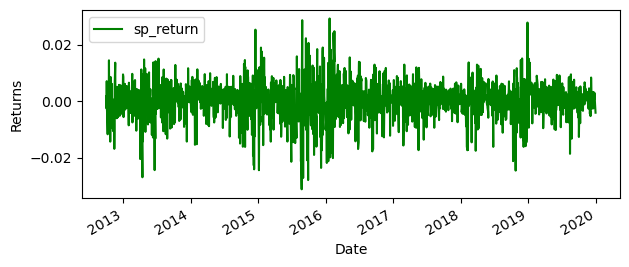

In [4]:
plt.subplot(2,1,2)
pf.plotting.plot_returns(sp)
plt.tight_layout()

<Axes: title={'center': 'Annual returns'}, xlabel='Returns', ylabel='Year'>

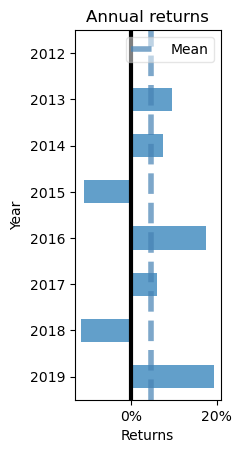

In [5]:
fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(sp)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

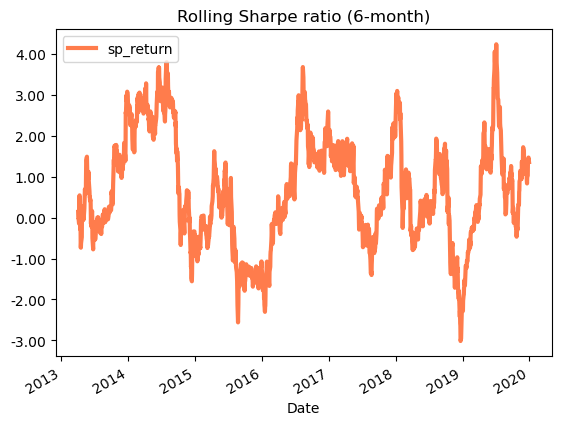

In [6]:
pf.plot_rolling_sharpe(sp);

C:\Users\horac\AppData\Local\Temp\ipykernel_2408\1845159857.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp1['Close'] = sp1['Close'].str.replace('$', '')
C:\Users\horac\ana\lib\site-packages\empyrical\stats.py:262: RuntimeWarning: overflow encountered in accumulate
  out.cumprod(axis=0, out=out)
C:\Users\horac\ana\lib\site-packages\empyrical\stats.py:262: RuntimeWarning: overflow encountered in accumulate
  out.cumprod(axis=0, out=out)
C:\Users\horac\ana\lib\site-packages\empyrical\stats.py:262: RuntimeWarning: overflow encountered in accumulate
  out.cumprod(axis=0, out=out)


AttributeError: 'numpy.int64' object has no attribute 'to_pydatetime'

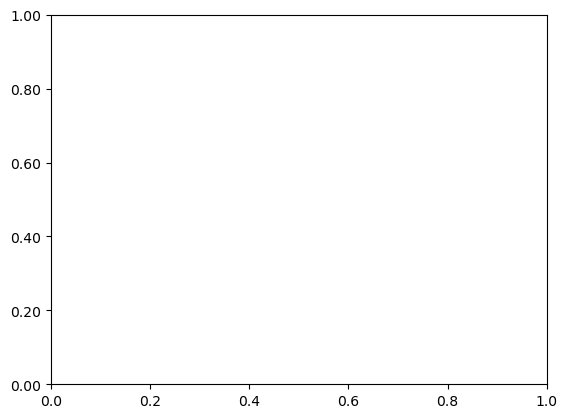

In [6]:
sp1 = pd.read_csv(r'C:\Users\horac\Desktop\fintech\Starter_Code\Resources\sp_tsx_history.csv',index_col='Date', parse_dates=True, infer_datetime_format=True).dropna()
sp1['Close'] = sp1['Close'].str.replace('$', '')
sp1['Close'] = sp1['Close'].str.replace(',', '').astype(float)
pf.plot_drawdown_periods(sp1)
#not working due to library issue

In [ ]:
pip uninstall pyfolio

In [ ]:
pip install git+https://github.com/quantopian/pyfolio